## Introduction

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as • Location of the restaurant • Approx Price of food • Theme based restaurant or not • Which locality of that city serves that cuisines with maximum number of restaurants • The needs of people who are striving to get the best cuisine of the neighborhood • Is a particular neighborhood famous for its own kind of food.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# Reading the file 
df = pd.read_csv(r'C:\Users\user\Desktop\Capstone Summer 19\zomato-bangalore-restaurants\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Columns description

1. url: the url of the restaurant in the zomato website

2. address: the address of the restaurant in Bengaluru

3. name: the name of the restaurant

4. online_order: whether online ordering is available in the restaurant or not

5. book_table: table book option available or not

6. rate: the overall rating of the restaurant out of 5

7. votes: total number of rating for the restaurant as of the above mentioned date

8. phone: the phone number of the restaurant

9. location: the neighborhood in which the restaurant is located

10. rest_type: restaurant type

11. dish_liked: dishes people liked in the restaurant

12. cuisines: food styles, separated by comma

13. approx_cost(for two people): the approximate cost for meal for two people

14. reviews_list: list of tuples containing reviews for the restaurant, each tuple

15. menu_item: list of menus available in the restaurant

16. listed_in(type): type of meal

17. listed_in(city): the neighborhood in which the restaurant is listed

In [3]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

### 1. Cleaning the data

In [5]:
#change some of the names of columns which are confusing
df.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
# convert the string to float for rating
df.rate = df.rate.replace("NEW", np.nan)
df.dropna(how ='any', inplace = True)

df.rate = df.rate.astype(str)
df.rate = df.rate.apply(lambda df: df.replace('/5',''))
df.rate = df.rate.apply(lambda df: float(df))
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# drop some columns that won't contribute to generate insights such as url and phone number
df2 = df.drop(columns=['url','phone'])
df2.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [87]:
# remove comma for the average_cost and change a datatype to float
k = df2.average_cost.apply(lambda df2: df2.replace(',',''))
df2.average_cost = df2.average_cost.apply(lambda k: k.replace(',',''))
df2.average_cost = df2.average_cost.apply(lambda df2: float(df2))
df2

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
10,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


In [88]:
df2.dtypes

address             object
name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
average_cost       float64
reviews_list        object
menu_item           object
restaurant_type     object
locality            object
dtype: object

### 2. Exploratory data analysis

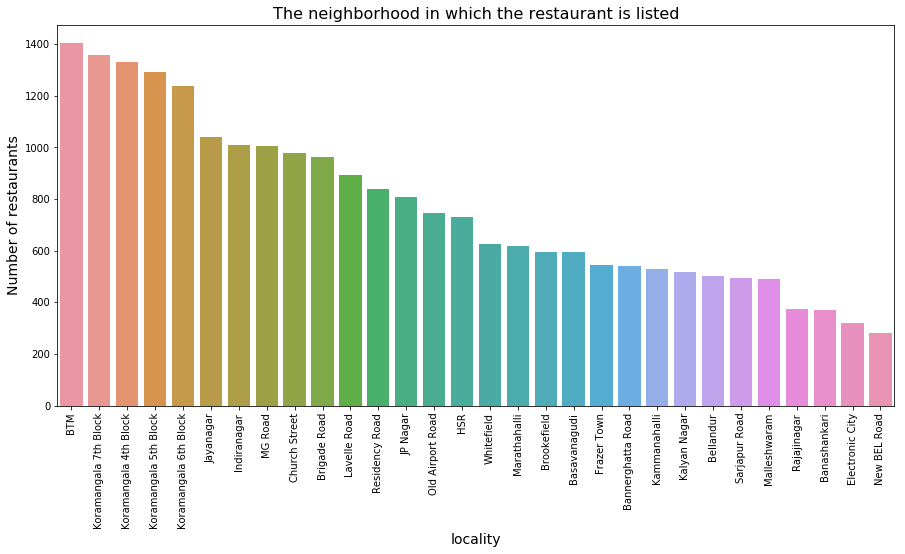

In [8]:
loc = df2['locality'].value_counts()

plt.figure(figsize=(15,7))
sns.barplot(loc.index, loc.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('locality', fontsize=14)
plt.ylabel('Number of restaurants', fontsize=14)
plt.title("The neighborhood in which the restaurant is listed", fontsize=16)
plt.show()

* BTM (Bommanhalli, Tavarekere and Madiwala) is the neighborhood where has the highest number of the restaurants

Text(0.5, 0, 'count')

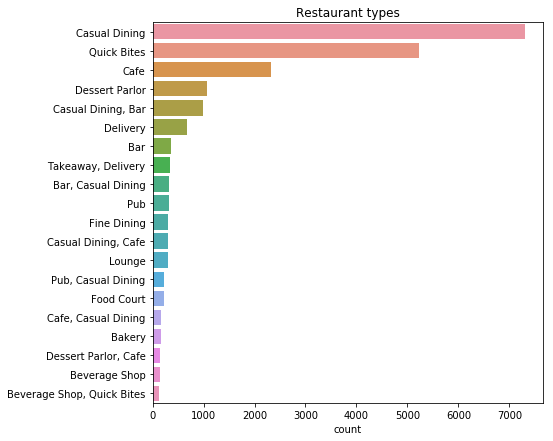

In [9]:
plt.figure(figsize=(7,7))
rest=df2['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

In [10]:
rest

Casual Dining                 7298
Quick Bites                   5224
Cafe                          2321
Dessert Parlor                1074
Casual Dining, Bar             980
Delivery                       667
Bar                            357
Takeaway, Delivery             341
Bar, Casual Dining             328
Pub                            325
Fine Dining                    312
Casual Dining, Cafe            302
Lounge                         298
Pub, Casual Dining             217
Food Court                     217
Cafe, Casual Dining            159
Bakery                         157
Dessert Parlor, Cafe           143
Beverage Shop                  138
Beverage Shop, Quick Bites     134
Name: rest_type, dtype: int64

In [11]:
rest.index

Index(['Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor',
       'Casual Dining, Bar', 'Delivery', 'Bar', 'Takeaway, Delivery',
       'Bar, Casual Dining', 'Pub', 'Fine Dining', 'Casual Dining, Cafe',
       'Lounge', 'Pub, Casual Dining', 'Food Court', 'Cafe, Casual Dining',
       'Bakery', 'Dessert Parlor, Cafe', 'Beverage Shop',
       'Beverage Shop, Quick Bites'],
      dtype='object')

* Because Banglore is known as the tech capital of India, people probably prefer Quick Bites when they live in a busy life.

<Figure size 504x504 with 0 Axes>

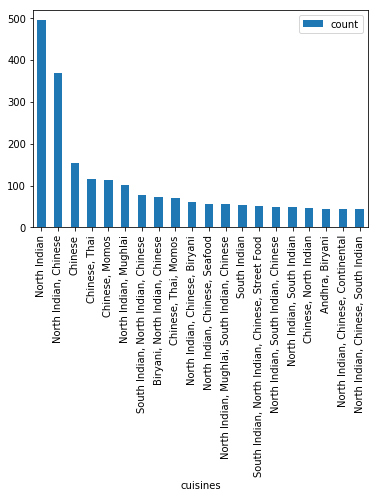

In [12]:
plt.figure(figsize=(7,7))
casual_rest =df2[df2['rest_type']=='Casual Dining']
grouped = casual_rest.groupby('cuisines')['name'].agg(['count']).sort_values(by=['count'], ascending=False)

top_20 = grouped.head(20)
top_20.plot.bar()

Text(0.5, 0, 'count')

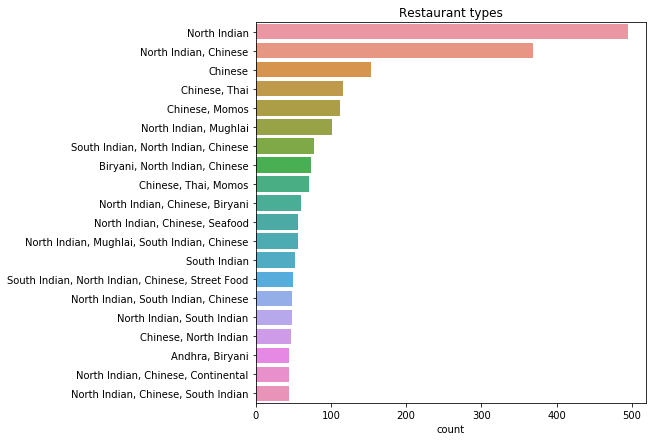

In [13]:
plt.figure(figsize=(7,7))
r=casual_rest['cuisines'].value_counts()[:20]
sns.barplot(r,r.index)
plt.title("Restaurant types")
plt.xlabel("count")

Text(0.5, 0, 'count')

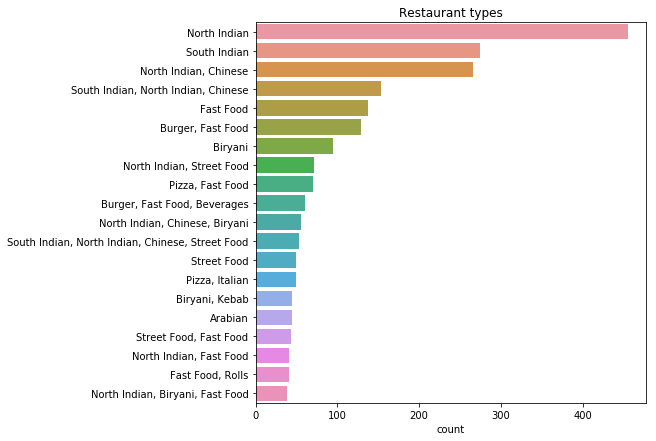

In [14]:
quick_rest =df2[df2['rest_type']=='Quick Bites']

plt.figure(figsize=(7,7))
r2=quick_rest['cuisines'].value_counts()[:20]
sns.barplot(r2,r2.index)
plt.title("Restaurant types")
plt.xlabel("count")

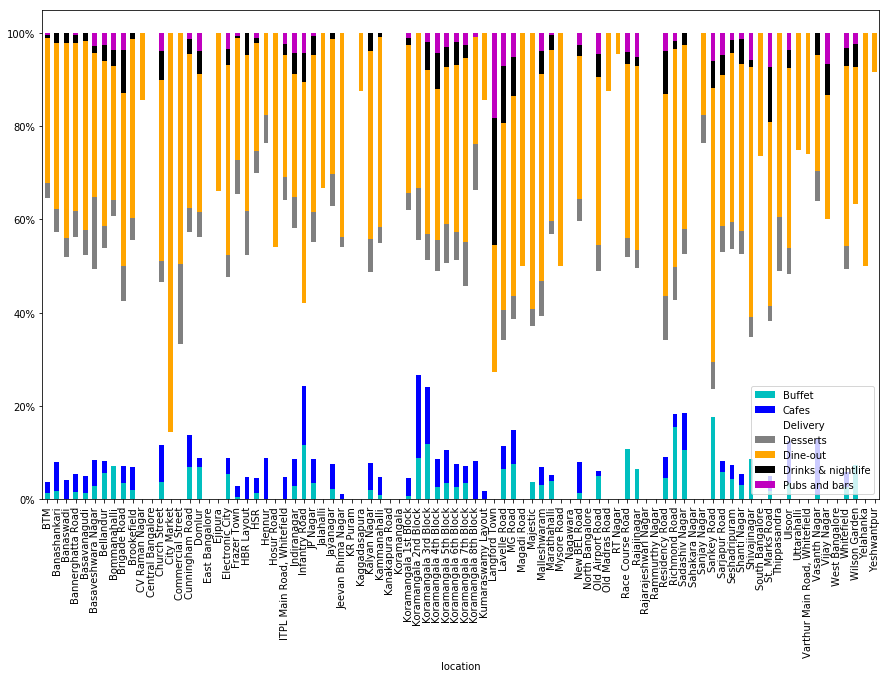

In [15]:
# location versus meal_type
plt.rcParams['figure.figsize'] = 15,9;
df2.groupby(['location','restaurant_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','b','w','grey','orange','black','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='best');

* All locations have large numbers of its restaurantas as highly rated restaurants which is matching with previous conclusion
* There are a lot of locations where around 20% of its restaurants are exceptionally rated that means above 4 out 5.
* Brigade Road, Church Street, Lavelle Road, MG Road and Residency Road has more than 30% of its restaurants are exceprtionally rated
* Lavell Road has the highest percentage around 75% of its resturants in exceptionally rated categroy
* It's quiet clear that different locations has different rate style

So croweded as we have 92 locations, but you can notice the following:

* The majority of restaurants in the cheap price category (200-500) as average-cost for 2 persons
* Some neibourhood has style of cost range like and not limited to:
    1. Central Bamglore & Kengri : 100% of resturants in the cheap region
    2. Lavelle Road: has expensive style majpority
    3. Sankey Road: has expensive and extra expensive restuarants with little moderate and neither cheap nor very cheap
    4. Rajarajeshwari Nagar : has the moderate style of cost_range 500-1000
    5. Hebbbal : divided between very cheap and moderate
* Likely certain locations affected by the level of population hence the costing strategy differs To get more focus let seprate those locations to get the idea

In [16]:
import re
df2_dish=df2[df2['dish_liked'].notnull()]
df2_dish.index=range(df2_dish.shape[0])
likes=[]
for i in range(df2_dish.shape[0]):
    splited_array=re.split(',',df2_dish['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [17]:
print("Count of Most liked dishes of Bangalore")
fav_food = pd.Series(likes).value_counts()
fav_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta              2650
 Pizza              1903
 Cocktails          1863
 Burgers            1724
 Mocktails          1585
 Biryani            1308
 Sandwiches         1281
Burgers             1239
 Coffee             1155
 Nachos             1153
 Fish               1116
 Paratha            1097
 Salads             1038
 Chicken Biryani    1002
Cocktails            891
 Fries               875
 Mutton Biryani      832
 Beer                827
 Noodles             821
 Tea                 800
dtype: int64

In [18]:
quick_rest.index=range( quick_rest.shape[0])
likes=[]
for i in range(quick_rest.shape[0]):
    splited_array=re.split(',',quick_rest['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [19]:
fav_food_q = pd.Series(likes).value_counts()
fav_food_q.head(20)

 Paratha            488
Burgers             396
 Thali              332
Rolls               307
 Tea                293
Paratha             273
 Masala Dosa        272
 Roti               265
 Biryani            260
 Fries              239
 Rolls              225
 Filter Coffee      221
 Lassi              207
 Coffee             206
 Chaat              206
Masala Dosa         202
 Vada               192
 Panipuri           181
 Chicken Biryani    179
 Idli               175
dtype: int64

In [20]:
casual_rest.index=range(casual_rest.shape[0])
likes=[]
for i in range(casual_rest.shape[0]):
    splited_array=re.split(',',casual_rest['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [21]:
fav_food_cr = pd.Series(likes).value_counts()
fav_food_cr.head(20)

 Fish                 669
 Biryani              656
 Chicken Biryani      613
 Mutton Biryani       612
 Mocktails            504
 Pasta                495
 Butter Chicken       461
 Salads               423
Noodles               404
 Vegetable Biryani    397
Biryani               384
 Tandoori Chicken     384
 Chicken Curry        361
 Noodles              357
 Sea Food             356
 Roti                 345
 Paratha              341
 Thali                330
 Dal Makhani          320
 Momos                314
dtype: int64

In [22]:
df_lc=df.groupby(['location','cuisines']).agg('count')
df3=df_lc.sort_values(['url'],ascending=False).groupby(['location'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

df3.head(10)

,level_0,location,cuisines,count
0,0,BTM,"North Indian, Chinese",87
1,0,BTM,North Indian,86
2,0,BTM,Cafe,42
3,1,Banashankari,"North Indian, Chinese",30
4,1,Banashankari,South Indian,25
5,1,Banashankari,"South Indian, North Indian, Chinese",17
6,2,Banaswadi,"Cafe, Fast Food",10
7,2,Banaswadi,South Indian,9
8,2,Banaswadi,"North Indian, Chinese",7
9,3,Bannerghatta Road,"North Indian, Chinese",58


* It shows the most common cuisines in each locations. Seems like North Indian & Chinese are one of the most famous cuisines in all locations. Even though South Indian is the most famous cuisine in these top two areas which are Banashankari and Banaswadi, it didn't rank in top 3 in BTM are where is the most foodie place. Hence, I wouldn't recommend to open the South Indian restaurant in BTM area.  

In [23]:
from collections import Counter
loc_dish = df2.groupby('location')['dish_liked'].value_counts()
ind = loc_dish.index.levels[0]
top_dish = []
for i in ind:
    dish_counter = Counter([e.strip() for e in ','.join(loc_dish[i].index).split(',') if e])
    top_dish.append(','.join(i[0] for i in dish_counter.most_common()[:1]))

In [24]:
loc_dish_df = pd.DataFrame({'location':ind,'top_dish':top_dish})
del top_dish
loc_dish_df.head()

,location,top_dish
0,BTM,Paratha
1,Banashankari,Pasta
2,Banaswadi,Biryani
3,Bannerghatta Road,Chicken Biryani
4,Basavanagudi,Masala Dosa


It seems that a lot of neighbourhoods are characterised by a certain type of dish liked

In [25]:
#Get All the North Indian Food Serving Restaurants
NorthIndianFoodRestaurants = df2[df2['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodRestaurants.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


In [26]:
# Get top North Indian Food restaurants where the rate is above 4.9 and votes are high to perform competitor analysis
NorthIndianFoodRestaurants2 = NorthIndianFoodRestaurants[NorthIndianFoodRestaurants['rate']>=4.9][:10].sort_values(by=['votes'], ascending=False)
NorthIndianFoodRestaurants2

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
3921,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
4801,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Dine-out,Bellandur
4944,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Drinks & nightlife,Bellandur
21279,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6452,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n Undoubtedly the best ...",[],Dine-out,Jayanagar
19393,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,Jayanagar
8260,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n We liked the place a ...",[],Buffet,BTM
10389,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n We liked the place a ...",[],Dine-out,BTM
6746,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,No,Yes,4.9,2745,Whitefield,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ","1,400","[('Rated 5.0', 'RATED\n Food quality is amazi...",[],Buffet,Brookefield
7888,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,No,Yes,4.9,2745,Whitefield,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ","1,400","[('Rated 5.0', 'RATED\n Food quality is amazi...",[],Dine-out,Brookefield
7118,"Ground Floor, Forum Shantiniketan, Whitefield ...",Punjab Grill,Yes,No,4.9,518,Whitefield,Casual Dining,"Kadai Paneer, Kulfi, Kadhai Paneer, Dahi Kebab...",North Indian,"2,000","[('Rated 5.0', 'RATED\n The food is great...t...","['Multani Paneer Tikka', 'Dal Punjab Grill', '...",Delivery,Brookefield


In [27]:
NorthIndianFoodRestaurants2[NorthIndianFoodRestaurants2['location']=='BTM'][:5]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
21279,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6452,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n Undoubtedly the best ...",[],Dine-out,Jayanagar
19393,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,Jayanagar
8260,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n We liked the place a ...",[],Buffet,BTM
10389,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n We liked the place a ...",[],Dine-out,BTM


In [28]:
NorthIndianFoodRestaurants[NorthIndianFoodRestaurants['location']=='Banashankari'][:5]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
20,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0,62,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Cafes,Banashankari
31,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari


In [29]:
#Finding  Average cost 
avgc=max(df2.average_cost)
avgc

'950'

In [30]:
#Finding Maximum Value of Votes
df2.loc[:,"votes"].max()

16832

In [31]:
#The restaurants with rating greater than 4.5 and average cost lesser than 900
df2_cost=df2[['name','rate','average_cost','cuisines','dish_liked']].groupby(['rate'], sort = True)
df2_cost=df2_cost.filter(lambda x: x.mean() >= 4.5)
df2_cost

df2_rate=df2_cost[['name','rate','average_cost','cuisines','dish_liked']].groupby(['rate'], sort = True)
df2_rate=df2_rate.filter(lambda x: x.mean() < 900)
df2_rate

,name,rate,average_cost,cuisines,dish_liked
7,Onesta,4.6,600,"Pizza, Cafe, Italian","Farmhouse Pizza, Chocolate Banana, Virgin Moji..."
44,Onesta,4.6,600,"Pizza, Cafe, Italian","Farmhouse Pizza, Chocolate Banana, Virgin Moji..."
164,The Blue Wagon - Kitchen,4.6,400,"Cafe, Beverages","Pizza, Nachos, Garlic Maggi, Burgers, Cheese M..."
181,Shakes Theory,4.5,300,"Beverages, Sandwich","Sandwiches, Thick Shakes, Paan Shake, Brownie ..."
557,Onesta,4.6,600,"Pizza, Cafe, Italian","Farmhouse Pizza, Chocolate Banana, Virgin Moji..."
632,Taaza Thindi,4.7,100,South Indian,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari..."
868,Barbeque Nation,4.7,"1,600","North Indian, European, Mediterranean, BBQ, Kebab","Lunch Buffet, Goan Fish Curry, Mocktails, Chic..."
933,XO Belgian Waffle,4.5,400,"Desserts, Beverages","Blueberry Waffles, Nutella Waffle, Hot Chocola..."
1035,Galito's,4.6,"1,000","African, Burger","Chicken Grill, Garlic Bread, Mocktails, Burger..."
2241,Hakuna Matata,4.5,"1,200","North Indian, Asian, Seafood, Chinese","Mocktails, Cocktails, Appam, Paneer Satay, Sea..."


Text(0.5, 1.0, 'Cost of Restuarant')

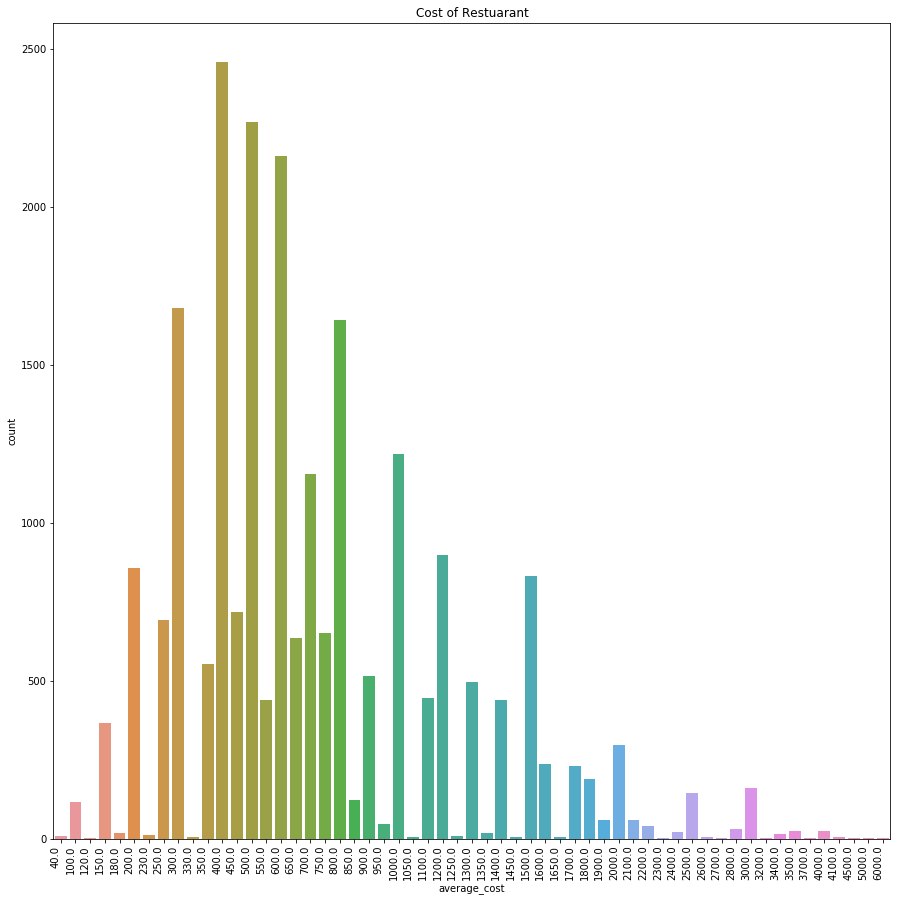

In [89]:
#Cost of Restuarant
sns.countplot(df2['average_cost'])
sns.countplot(df2['average_cost']).set_xticklabels(sns.countplot(df2['average_cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

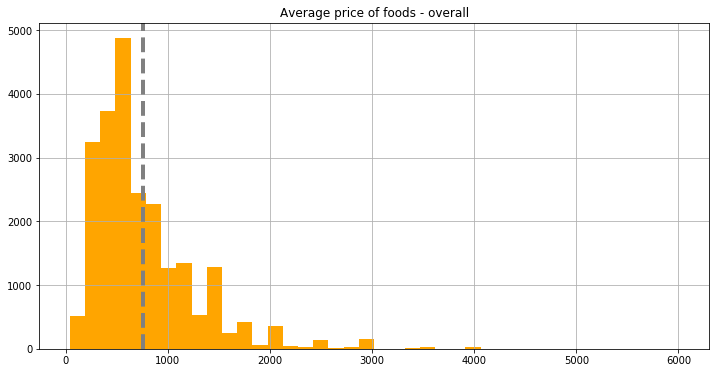

In [95]:
plt.figure(figsize=(12,6))
df2.average_cost.hist(bins=40,color='orange')
plt.axvline(df2.average_cost.mean(), color='grey', linestyle='dashed', linewidth=4)
plt.title('Average price of foods - overall')
plt.show()

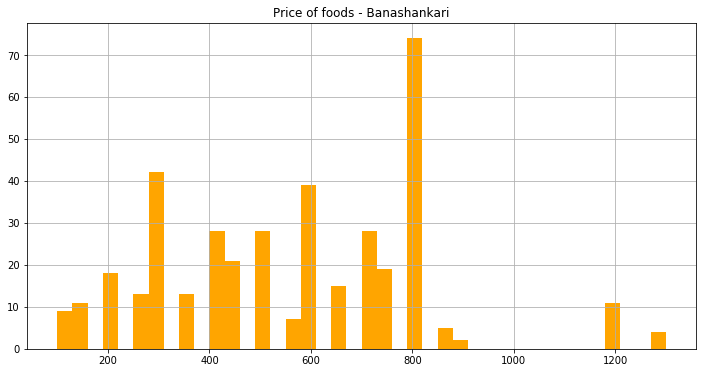

In [110]:
plt.figure(figsize=(12,6))
df2[(df2['location']=='Banashankari')].average_cost.hist(bins=40,color='orange')
plt.title('Price of foods - Banashankari')
plt.show()

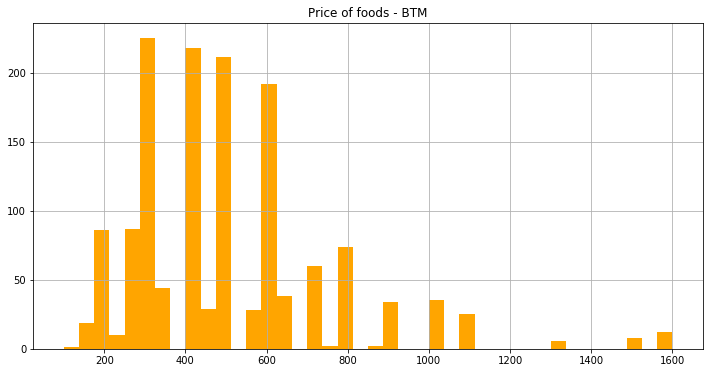

In [109]:
plt.figure(figsize=(12,6))
df2[(df2['location']=='BTM')].average_cost.hist(bins=40,color='orange')
plt.title('Price of foods - BTM')
plt.show()

## display which type of restaurant having online order option or not

[Text(0, 0, 'Buffet'),
 Text(0, 0, 'Cafes'),
 Text(0, 0, 'Delivery'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Dine-out'),
 Text(0, 0, 'Drinks & nightlife'),
 Text(0, 0, 'Pubs and bars')]

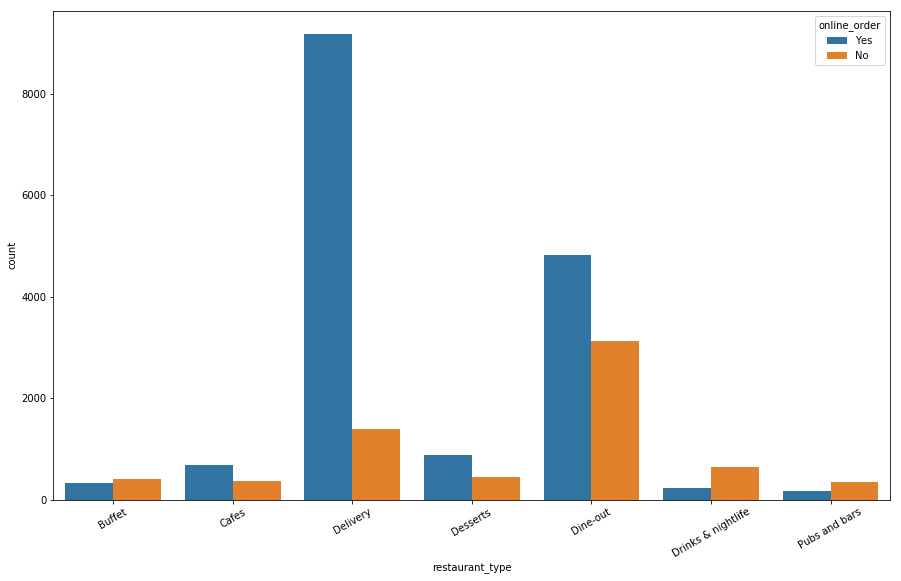

In [111]:
chart =sns.countplot(df2['restaurant_type'],hue=df2['online_order'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)

In [112]:
pd.crosstab(df2['restaurant_type'],df2['online_order'])

online_order,No,Yes
restaurant_type,,
Buffet,418,335
Cafes,365,681
Delivery,1396,9179
Desserts,447,883
Dine-out,3134,4820
Drinks & nightlife,645,226
Pubs and bars,344,173


so from above we can see that 354 buffet type restaurants having online order facility while 528 buffet type restaurant not having online order facility

##  Is there a relation between online order/ table booking option and rating of the restaurant?

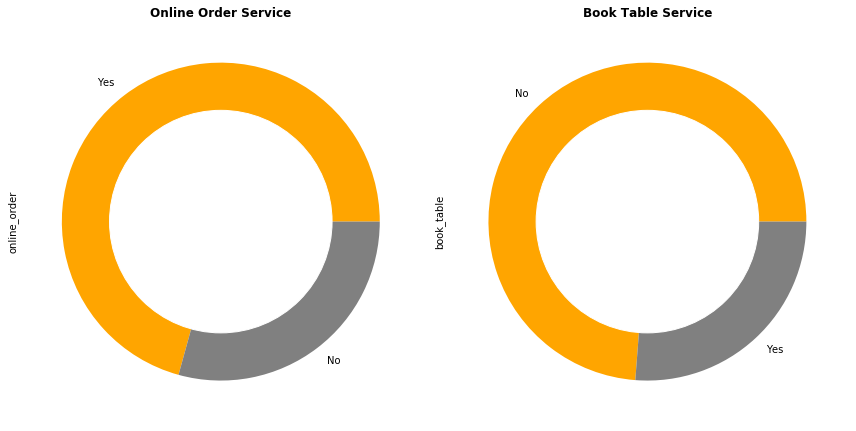

In [113]:
# plotting parameters
# set the color for the graph
colors = ['grey' for i in range(df2.location.nunique())]
colors[0] = 'orange'

plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1, 2, 1)
df2.online_order.value_counts().plot('pie',colors=colors)
# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Online Order Service',weight ='bold');

plt.subplot(1, 2, 2)
df2.book_table.value_counts().plot('pie',colors=colors)
# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Book Table Service',weight ='bold')
plt.tight_layout();
plt.rcParams['figure.figsize'] = 8,6

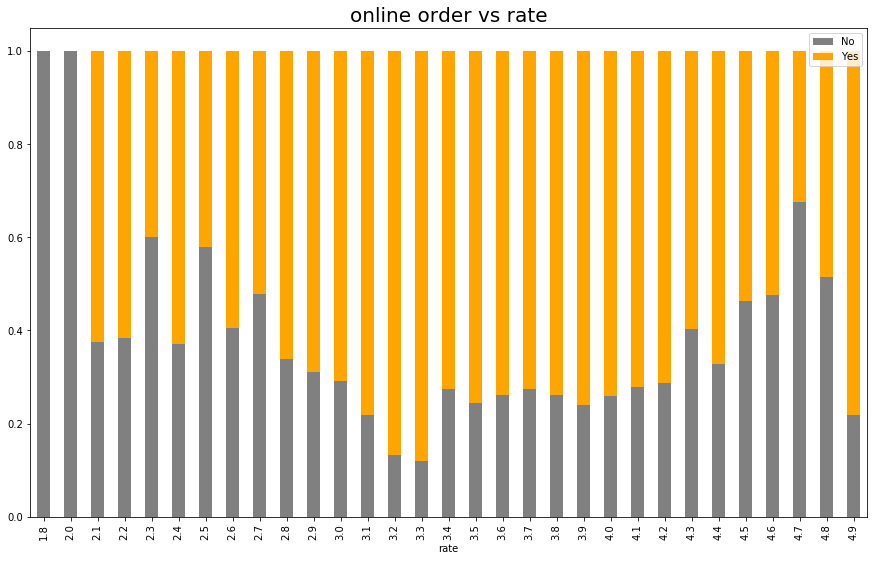

In [114]:
# X[['online_order','rate']].groupby(['rate']).sum(axis=0)
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df2['rate'], df2['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['grey','orange'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

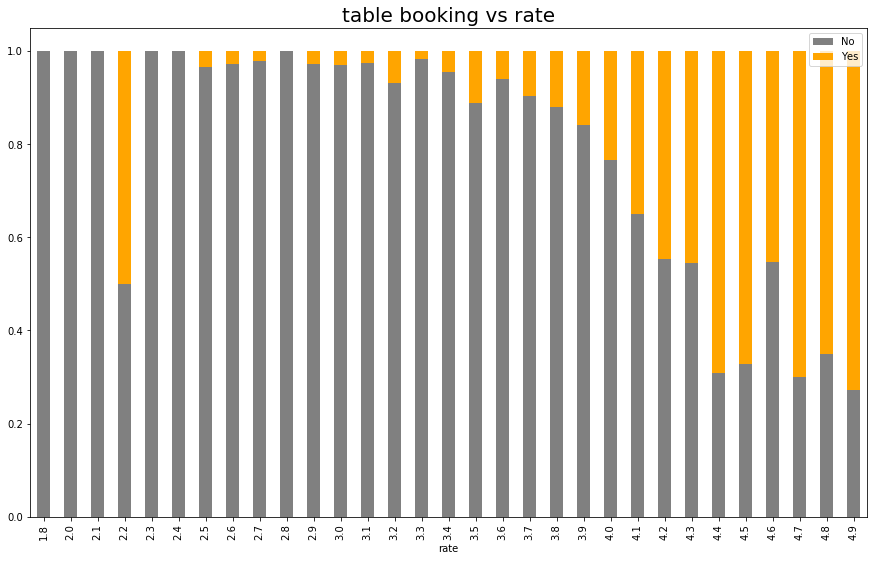

In [115]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df2['rate'], df2['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['grey','orange'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

* You are more likely to receive a higher rating if your restaurant offers online order option.
* You can say that you have the table booking option for Highly rated restaurants.

[Text(0, 0, 'Buffet'),
 Text(0, 0, 'Cafes'),
 Text(0, 0, 'Delivery'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Dine-out'),
 Text(0, 0, 'Drinks & nightlife'),
 Text(0, 0, 'Pubs and bars')]

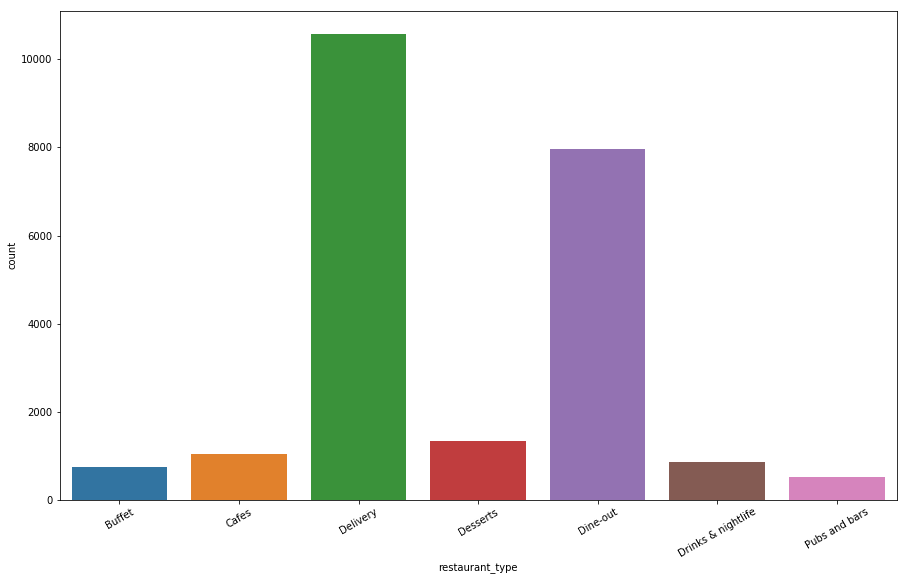

In [116]:
chart =sns.countplot(df2['restaurant_type'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)

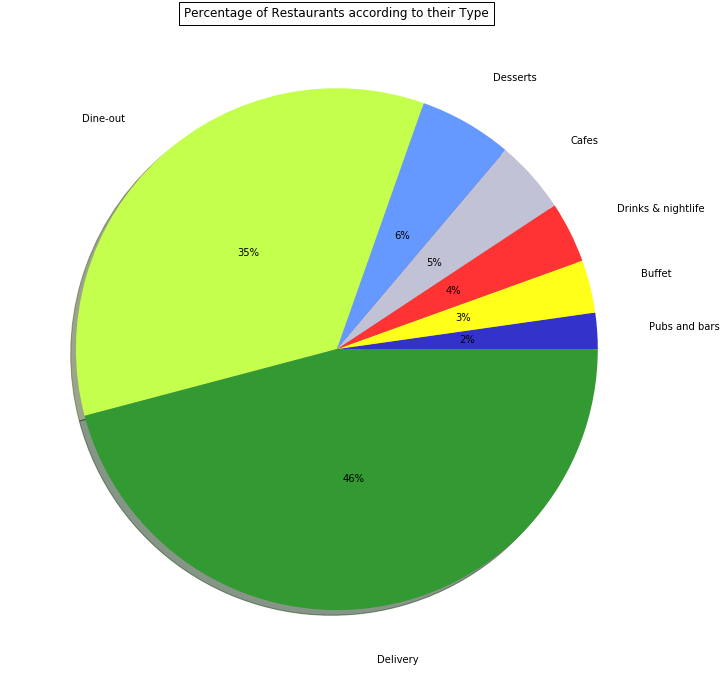

In [117]:
restaurantTypeCount=df2['restaurant_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

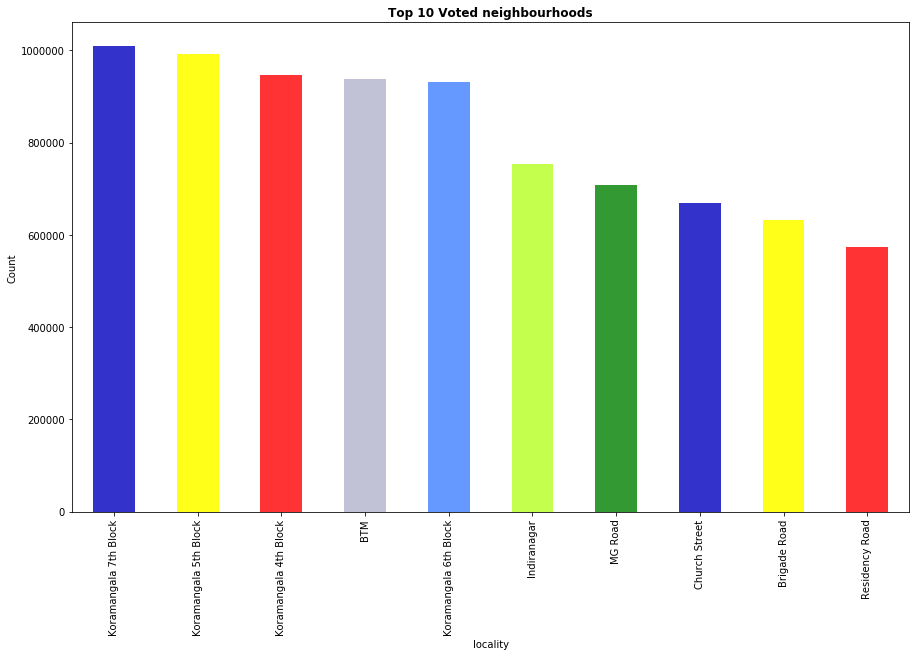

In [118]:
df2.groupby('locality')['votes'].sum().sort_values(ascending=False)[:10].plot('bar',color=colors)
plt.title('Top 10 Voted neighbourhoods',weight='bold')
plt.ylabel('Count');

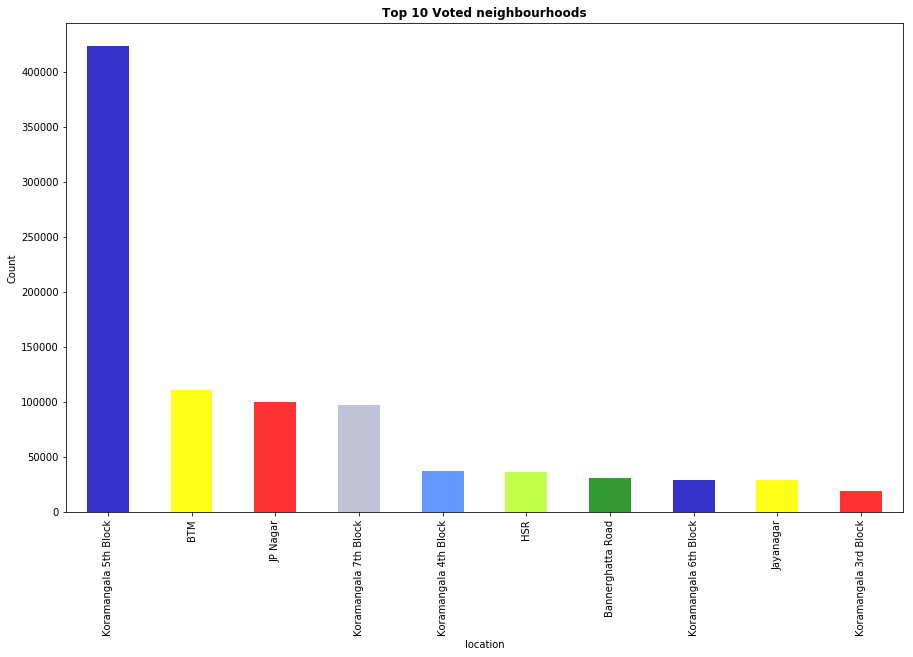

In [119]:
top10_btmlocation =df2[df2['locality']=='BTM']

top10_btmlocation.groupby('location')['votes'].sum().sort_values(ascending=False)[:10].plot('bar',color=colors)
plt.title('Top 10 Voted neighbourhoods',weight='bold')
plt.ylabel('Count');

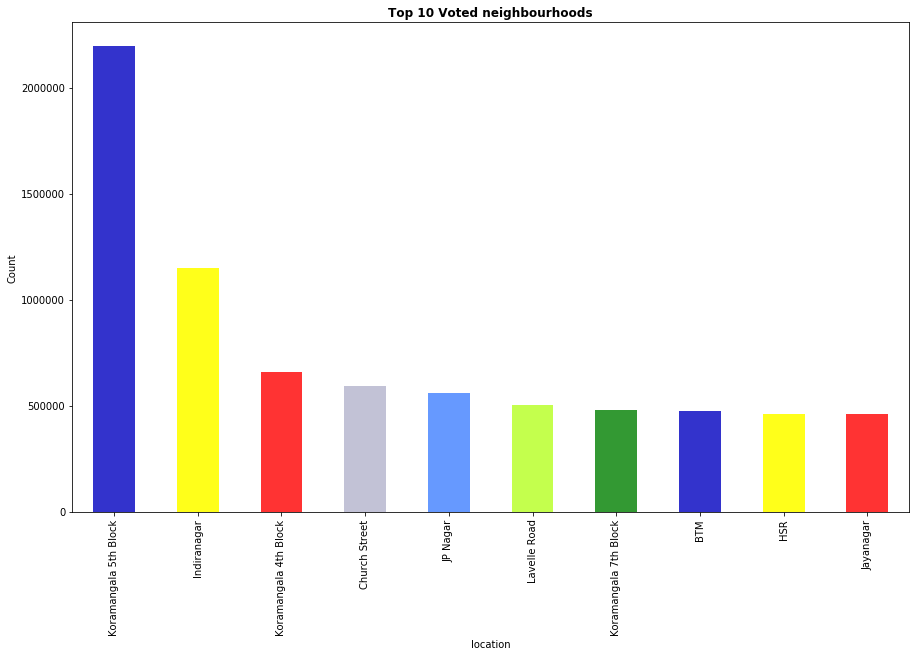

In [120]:
df2.groupby('location')['votes'].sum().sort_values(ascending=False)[:10].plot('bar',color=colors)
plt.title('Top 10 Voted neighbourhoods',weight='bold')
plt.ylabel('Count');

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'average_cost',
       'reviews_list', 'menu_item', 'restaurant_type', 'locality'],
      dtype='object')

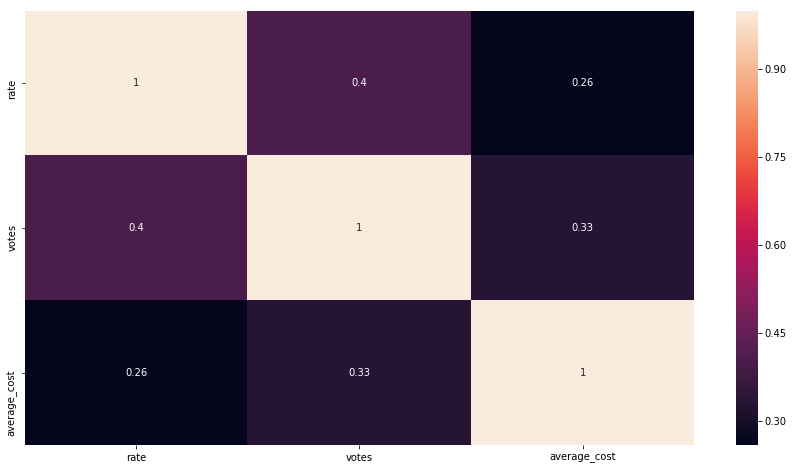

In [121]:
#Get Correlation between different variables
corr = df2.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df2.columns

In [126]:
df.groupby('location')['average_cost'].mean().sort_values(ascending=False).head(10)

DataError: No numeric types to aggregate

In [ ]:
df2[df2['location']=='BTM']['average_cost.amountMax'].mean()

In [ ]:
#Correlation matrix
corrmat = df2.corr()
#f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, square=True);

In [ ]:
plt.figure(figsize=(12,6))
df2[df2['average_cost']<1500].average_cost.hist(bins=40,color='khaki')
plt.axvline(final[final['average_cost']<=1500].PREVAILING_WAGE.median(), 
            color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

In [ ]:
df2.head()
df2.average_cost = df2.average_cost.apply(lambda x: x.replace(',',''))
df2.average_cost = df2.average_cost.astype(int)
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df2['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

In [ ]:
df2.average_cost.apply(lambda x: x.replace(',',''))

# findings 

Also, observe that these cheaper options (cost<500) are all either Quick Bites, Cafe or Dessert Parlour.
Casual Dining restaurants start above 600
6 out of 10 of the cheapest restaurants serve South Indian Cuisine
As for the location, these cheap restaurant option are scattered and not localised to any specific location of the city.

We can also explore the expensive options :-
Here, we are only picking up the restaurants that cost more than 3000(half of most expensive restaurant) and are highest rated , have large votes.

The Oberoi Hotel, Karavalli and JW Marriott make this high profile list

Interestingly, all these restaurants have the same location- Brigade Road and same restaurant type- Fine dining